In [22]:
import pandas
import pingouin as pin
import numpy as np
from scipy.stats import (
    iqr, uniform, binom, norm, poisson, expon,
    t,
    chisquare,  # for goodness of fit
    rankdata
)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

data_folder = '../../data'

df_boat = pandas.read_csv(f'{data_folder}/boat.csv')

cur_amount = list(df_boat['Price'].str.split(' '))
cur_type = []
amount = []
for r in cur_amount:
    cur_type.append(r[0])
    amount.append(int(r[1]))
display(cur_type[:5])
display(amount[:5])

df_boat['cur_type'] = cur_type
df_boat['cur_amount'] = amount
df_boat.head()

['CHF', 'EUR', 'CHF', 'DKK', 'EUR']

[3337, 3490, 3770, 25900, 3399]

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,cur_type,cur_amount
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF,3337
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF,3770
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK,25900
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399


In [30]:
price_views = df_boat.groupby('Price')['Number of views last 7 days']\
    .sum().sort_values(ascending=False).reset_index()
display(len(price_views))
price_views.head(10)

3182

,Price,Number of views last 7 days
0,EUR 65000,11073
1,EUR 45000,9497
2,EUR 89000,9448
3,EUR 35000,9242
4,EUR 25000,8469
5,EUR 99000,8327
6,EUR 75000,7541
7,EUR 55000,6826
8,EUR 85000,6684
9,EUR 79000,6663


# Most views by price

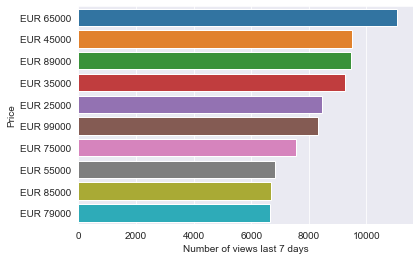

In [27]:
top_10 = price_views.head(10)
sns.barplot(data=top_10,y='Price',x='Number of views last 7 days')
plt.show()

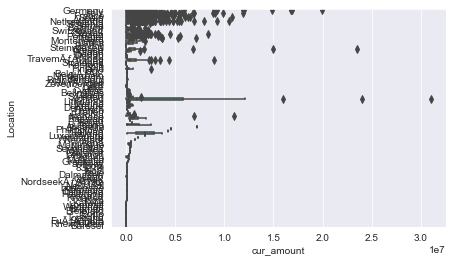

In [35]:
sns.boxplot(
    data=df_boat[df_boat['cur_type']=='EUR'],y='Location',x='cur_amount')
plt.show()

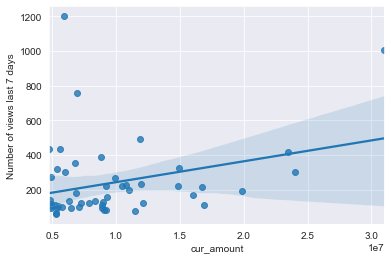

In [40]:
# EUR views
sns.regplot(
    data=df_boat[df_boat['cur_type']=='EUR'].groupby('cur_amount')['Number of views last 7 days'].sum()\
    .sort_index(ascending=False).reset_index().head(50),x='cur_amount',y='Number of views last 7 days')
plt.show()

In [49]:
df_boat.set_index(['Boat Type','Manufacturer'])

Price  \
Boat Type           Manufacturer                       
Motor Yacht         Rigiflex power boats    CHF 3337   
Center console boat Terhi power boats       EUR 3490   
Sport Boat          Marine power boats      CHF 3770   
                    Pioner power boats     DKK 25900   
Fishing Boat        Linder power boats      EUR 3399   
...                                              ...   
Sport Boat          Sea Ray power boats     CHF 4900   
                    NaN                     EUR 4516   
                    BlueCraft power boats   EUR 4499   
Pontoon Boat        Whaly power boats       EUR 4300   
Fishing Boat        DarekCo power boats     CHF 3780   

                                                                   Type  \
Boat Type           Manufacturer                                          
Motor Yacht         Rigiflex power boats            new boat from stock   
Center console boat Terhi power boats               new boat from stock   
Sport Boat          Marine power boats              new boat from stock   
                    Pioner power boats              new boat from stock   
Fishing Boat        Linder power boats              new boat from stock   
...                                                                 ...   
Sport Boat          Sea Ray power boats              Used boat,Unleaded   
                    NaN                             new boat from stock   
                    BlueCraft power boats  new boat from stock,Unleaded   
Pontoon Boat        Whaly power boats               new boat from stock   
Fishing Boat        DarekCo power boats             new boat from stock   

                                           Year Built  Length  Width  \
Boat Type           Manufacturer                                       
Motor Yacht         Rigiflex power boats         2017    4.00   1.90   
Center console boat Terhi power boats            2020    4.00   1.50   
Sport Boat          Marine power boats              0    3.69   1.42   
                    Pioner power boats           2020    3.00   1.00   
Fishing Boat        Linder power boats           2019    3.55   1.46   
...                                               ...     ...    ...   
Sport Boat          Sea Ray power boats          1987    6.30   2.44   
                    NaN                             0    4.17   1.68   
                    BlueCraft power boats        2020    4.40   1.80   
Pontoon Boat        Whaly power boats            2018    4.37   1.89   
Fishing Boat        DarekCo power boats          2019    3.60   1.60   

                                                Material     Location  \
Boat Type           Manufacturer                                        
Motor Yacht         Rigiflex power boats             NaN  Switzerland   
Center console boat Terhi power boats      Thermoplastic      Germany   
Sport Boat          Marine power boats         Aluminium  Switzerland   
                    Pioner power boats               NaN      Denmark   
Fishing Boat        Linder power boats         Aluminium      Germany   
...                                                  ...          ...   
Sport Boat          Sea Ray power boats              NaN  Switzerland   
                    NaN                              GRP      Germany   
                    BlueCraft power boats            GRP      Germany   
Pontoon Boat        Whaly power boats                NaN        Italy   
Fishing Boat        DarekCo power boats              GRP  Switzerland   

                                           Number of views last 7 days  \
Boat Type           Manufacturer                                         
Motor Yacht         Rigiflex power boats                           226   
Center console boat Terhi power boats                               75   
Sport Boat          Marine power boats                             124   
                    Pioner power boats                              64   
Fishing Boa

In [50]:
# 1
df_boat.groupby('Location')['Number of views last 7 days'].sum().sort_values(ascending=False).head(10)

Location
Switzerland    374431
Germany        286993
Italy          209958
Netherlands    121982
France         118098
Croatia         94999
Spain           80914
United          22857
Denmark         22355
Austria         16471
Name: Number of views last 7 days, dtype: int64

In [51]:
# 2
df_boat.groupby('Material')['Number of views last 7 days'].sum().sort_values(ascending=False).head(10)

Material
GRP                    899339
Steel                  125036
PVC                     95968
Wood                    52296
Plastic                 39678
Aluminium               38816
Carbon Fiber             7953
Thermoplastic            3700
Hypalon                   538
Reinforced concrete       169
Name: Number of views last 7 days, dtype: int64

In [52]:
# 3
df_boat.groupby('Boat Type')['Number of views last 7 days'].sum().sort_values(ascending=False).head(10)

Boat Type
Motor Yacht            351659
Sport Boat             251418
Cabin Boat             131700
Flybridge              127534
Trawler                 75456
Pilothouse              74730
Hardtop                 65343
Bowrider                47183
Center console boat     37015
Fishing Boat            32434
Name: Number of views last 7 days, dtype: int64

In [53]:
# 4
df_boat.groupby('Type')['Number of views last 7 days'].sum().sort_values(ascending=False).head(10)

Type
Used boat,Diesel                538140
Used boat,Unleaded              408134
Used boat                       183563
new boat from stock,Unleaded    134863
new boat from stock              89795
new boat from stock,Diesel       34292
new boat on order,Unleaded       19099
Display Model,Unleaded           14052
new boat on order,Diesel         10944
new boat on order                10330
Name: Number of views last 7 days, dtype: int64

In [54]:
# 5
df_boat.groupby('Year Built')['Number of views last 7 days'].sum().sort_values(ascending=False).head(10)

Year Built
2020    175872
2019     88438
0        72302
2006     52614
2008     51351
2007     48392
2017     42420
2018     42030
2005     41354
2004     37143
Name: Number of views last 7 days, dtype: int64